In [1]:
# imports
import fileutils
import pandas as pd
import os
import matplotlib.pyplot as plt

### Copy new files to local machine

In [2]:
fileutils.get_newest_data()
curr_dir = fileutils.get_latest_dir()
curr_data_path = fileutils.LOCAL_DATA_DIR + curr_dir + "/"
curr_eval_path = fileutils.LOCAL_EVAL_DIR + curr_dir + "/"
curr_data_path

No new directories found.


'/Users/macbook/Documents/projects/iTPMS-canyon/data_evaluation/data/20230331-134930/'

# Wheel Speed

In [3]:
path_ws = curr_data_path + "WheelSpeed_" + curr_dir + ".csv"
if os.path.isfile(path_ws):
    ws = pd.read_csv(path_ws)
    ws['timestamps'] = pd.to_datetime(ws['timestamps_rising_edge'], unit="s", utc=True).dt.tz_convert('Europe/Berlin')
    ws

# Acceleration

In [4]:
device_names = ["MPU_1", "MPU_2", "MPU_3", "MPU_4", "MPU_5"]
acc_file_paths = []
for device in device_names:
    acc_file_paths.append(curr_data_path + device + "_" + curr_dir + ".csv")
acc_file_paths

['/Users/macbook/Documents/projects/iTPMS-canyon/data_evaluation/data/20230331-134930/MPU_1_20230331-134930.csv',
 '/Users/macbook/Documents/projects/iTPMS-canyon/data_evaluation/data/20230331-134930/MPU_2_20230331-134930.csv',
 '/Users/macbook/Documents/projects/iTPMS-canyon/data_evaluation/data/20230331-134930/MPU_3_20230331-134930.csv',
 '/Users/macbook/Documents/projects/iTPMS-canyon/data_evaluation/data/20230331-134930/MPU_4_20230331-134930.csv',
 '/Users/macbook/Documents/projects/iTPMS-canyon/data_evaluation/data/20230331-134930/MPU_5_20230331-134930.csv']

In [5]:
mpus = []
for idx, csv_path in enumerate(acc_file_paths):
    mpus.append(pd.read_csv(csv_path))
    mpus[idx]['timestamp'] = pd.to_datetime(mpus[idx]['timestamp'], unit="s", utc=True).dt.tz_convert('Europe/Berlin')
    mpus[idx] = mpus[idx].set_index('timestamp')
mpus[1]

,RAW_ACCEL_X,RAW_ACCEL_Y,RAW_ACCEL_Z,RAW_TEMP,RAW_GYRO_X,RAW_GYRO_Y,RAW_GYRO_Z
timestamp,,,,,,,
2023-03-31 13:49:30.257598720+02:00,16680.0,552.0,1840.0,-3904.0,99.0,-91.0,64.0
2023-03-31 13:49:30.258925824+02:00,16716.0,456.0,2052.0,-3872.0,111.0,-103.0,37.0
2023-03-31 13:49:30.263736576+02:00,16656.0,488.0,2004.0,-3888.0,100.0,-114.0,36.0
2023-03-31 13:49:30.265132032+02:00,16684.0,484.0,2072.0,-3856.0,87.0,-99.0,62.0
2023-03-31 13:49:30.268183808+02:00,16644.0,536.0,1968.0,-3856.0,105.0,-85.0,49.0
...,...,...,...,...,...,...,...
2023-03-31 13:50:30.311430144+02:00,16632.0,520.0,1892.0,-3776.0,83.0,-81.0,58.0
2023-03-31 13:50:30.312787456+02:00,16708.0,528.0,1912.0,-3792.0,77.0,-83.0,54.0
2023-03-31 13:50:30.314122752+02:00,16680.0,480.0,1932.0,-3840.0,104.0,-104.0,68.0


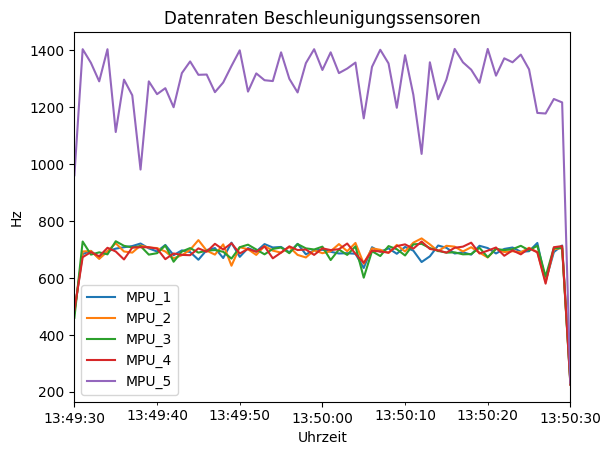

In [8]:

ax = plt.gca()
for idx, mpu in enumerate(mpus):
    mpu.resample('s').agg({'RAW_ACCEL_X':'count'}).plot(title="Datenraten Beschleunigungssensoren", 
                                                                ylabel="Hz", 
                                                                xlabel="Uhrzeit", 
                                                                marker="", 
                                                                label=device_names[idx],
                                                                ax=ax)
ax.legend(device_names)
plt.savefig(curr_eval_path + "imu_data_rate.png")

# Data Scaling

## Acceleration

In [9]:
# temp = (raw / 340) + 36.53
scale_gyroscope = 131.0
scale_acceleration = 16384.0

In [10]:
# iterate over all mpus
for idx, mpu in enumerate(mpus):
    # iterate over each value
    for col_name in mpu.columns:
        new_col_name = col_name.replace('RAW_', '')
        if "GYRO" in col_name:
            mpus[idx][new_col_name] = mpu[col_name] / scale_gyroscope
        elif "ACCEL" in col_name:
            mpus[idx][new_col_name] = mpu[col_name] / scale_acceleration
        elif "TEMP" in col_name:
            mpus[idx][new_col_name] = (mpu[col_name] / 340) + 36.53
mpus[0][['ACCEL_X', 'ACCEL_Y', 'ACCEL_Z', 'TEMP', 'GYRO_X', 'GYRO_Y', 'GYRO_Z' ]]

KeyError: "['timestamp'] not in index"

# Visualisation

## Acceleration

KeyError: 'ACCEL_X'

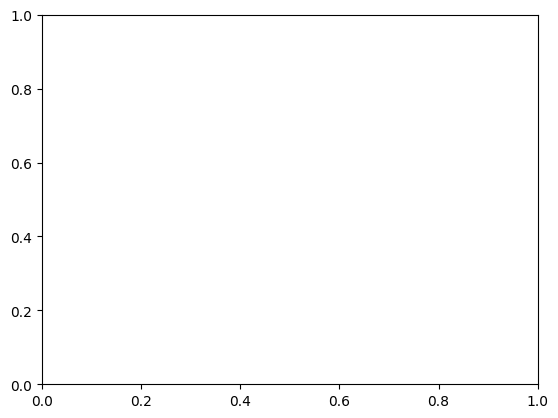

In [ ]:
col_names = ['ACCEL_X', 'ACCEL_Y', 'ACCEL_Z', 'TEMP', 'GYRO_X', 'GYRO_Y', 'GYRO_Z']
units = ['g', 'g', 'g', '°C', 'rad', 'rad', 'rad']
for idx, col_name in enumerate(col_names):
    fig = plt.figure()  
    ax = plt.gca()
    for mpu in mpus:
        mpu[col_name].plot(title="Plot " + col_name, 
                                            ylabel=units[idx], 
                                            xlabel="Uhrzeit", 
                                            ax=ax)
    ax.legend(device_names)
    plt.savefig(curr_eval_path + "plot_imu_" + col_name.lower() + ".png")
    